In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [96]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.shape

(520, 17)

In [ ]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
y = df['class']
y = pd.get_dummies(y, prefix_sep='_', drop_first=True)
X = df.drop(['class'], 1)
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Visualizando correlações

In [98]:
df1 = pd.get_dummies(df, prefix_sep='_', drop_first=True)

corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
Age,1.00,0.06,0.20,0.14,0.06,0.22,0.32,0.10,0.40,0.30,0.20,0.26,0.23,0.31,0.32,0.14,0.11
Gender_Male,0.06,1.00,-0.27,-0.31,-0.28,-0.12,-0.22,0.21,-0.21,-0.05,-0.01,-0.10,-0.33,-0.09,0.33,-0.01,-0.45
Polyuria_Yes,0.20,-0.27,1.00,0.60,0.45,0.26,0.37,0.09,0.24,0.09,0.24,0.15,0.44,0.15,-0.14,0.13,0.67
Polydipsia_Yes,0.14,-0.31,0.60,1.00,0.41,0.33,0.32,0.03,0.33,0.13,0.20,0.12,0.44,0.18,-0.31,0.10,0.65
sudden weight loss_Yes,0.06,-0.28,0.45,0.41,1.00,0.28,0.24,0.09,0.07,-0.00,0.14,0.09,0.26,0.11,-0.20,0.17,0.44
weakness_Yes,0.22,-0.12,0.26,0.33,0.28,1.00,0.18,0.03,0.30,0.31,0.15,0.34,0.27,0.26,0.09,0.05,0.24
Polyphagia_Yes,0.32,-0.22,0.37,0.32,0.24,0.18,1.00,-0.06,0.29,0.14,0.24,0.26,0.37,0.32,-0.05,0.03,0.34
Genital thrush_Yes,0.10,0.21,0.09,0.03,0.09,0.03,-0.06,1.00,-0.15,0.13,0.16,0.14,-0.20,-0.10,0.20,0.05,0.11
visual blurring_Yes,0.40,-0.21,0.24,0.33,0.07,0.30,0.29,-0.15,1.00,0.29,0.08,0.18,0.36,0.41,0.01,0.11,0.25
Itching_Yes,0.30,-0.05,0.09,0.13,-0.00,0.31,0.14,0.13,0.29,1.00,0.11,0.45,0.12,0.22,0.27,0.00,-0.01


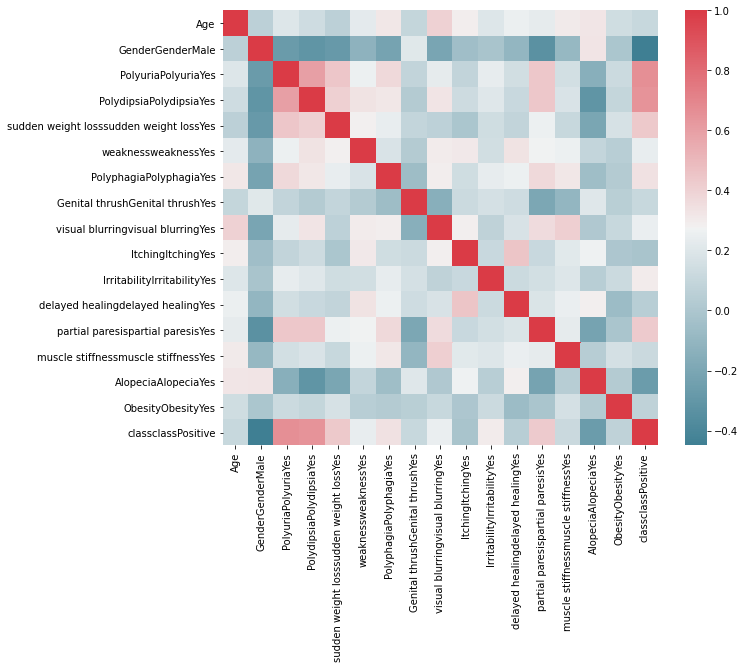

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Normaliza os dados

In [80]:
from sklearn.preprocessing import MinMaxScaler
# fit(X[, y]) - Compute the mean and std to be used for later scaling.
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

In [81]:
X.view()

array([[0.32432432, 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.56756757, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33783784, 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.56756757, 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.21621622, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.35135135, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Testa os modelos

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train,y_train.values.ravel())
svm.score(X_test,y_test.values.ravel())

0.9538461538461539

In [83]:
cross_val_score(svm,X,y.values.ravel(),cv=4).mean()
confusion_matrix(y.values.ravel(),svm.predict(X))
print(classification_report(y.values.ravel(),svm.predict(X)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       200
           1       0.95      0.95      0.95       320

    accuracy                           0.94       520
   macro avg       0.94      0.94      0.94       520
weighted avg       0.94      0.94      0.94       520



In [ ]:
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train,y_train.values.ravel())
svm_poly.score(X_test,y_test.values.ravel())

0.9615384615384616

In [84]:
cross_val_score(svm_poly,X,y.values.ravel(),cv=4).mean()
confusion_matrix(y.values.ravel(),svm_poly.predict(X))
print(classification_report(y.values.ravel(),svm_poly.predict(X)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       200
           1       1.00      0.96      0.98       320

    accuracy                           0.97       520
   macro avg       0.97      0.98      0.97       520
weighted avg       0.98      0.97      0.98       520



In [ ]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train.values.ravel())
svm_rbf.score(X_test,y_test.values.ravel())

0.9769230769230769

In [85]:
cross_val_score(svm_rbf,X,y.values.ravel(),cv=4).mean()
confusion_matrix(y.values.ravel(),svm_rbf.predict(X))
print(classification_report(y.values.ravel(),svm_rbf.predict(X)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       200
           1       0.98      0.98      0.98       320

    accuracy                           0.98       520
   macro avg       0.98      0.98      0.98       520
weighted avg       0.98      0.98      0.98       520



In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train.values.ravel())
rfc.score(X_test,y_test.values.ravel())

0.9923076923076923

In [86]:
cross_val_score(rfc,X,y.values.ravel(),cv=4).mean()
confusion_matrix(y.values.ravel(),rfc.predict(X))
print(classification_report(y.values.ravel(),rfc.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       320

    accuracy                           1.00       520
   macro avg       1.00      1.00      1.00       520
weighted avg       1.00      1.00      1.00       520



In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 100)
gbc.fit(X_train,y_train.values.ravel())
gbc.score(X_test,y_test.values.ravel())

0.9846153846153847

In [87]:
cross_val_score(gbc,X,y.values.ravel(),cv=4).mean()
confusion_matrix(y.values.ravel(),gbc.predict(X))
print(classification_report(y.values.ravel(),gbc.predict(X)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       200
           1       1.00      0.99      1.00       320

    accuracy                           1.00       520
   macro avg       1.00      1.00      1.00       520
weighted avg       1.00      1.00      1.00       520



In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_leaf_nodes': range(5, 40, 5)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, n_jobs=3)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.9769230769230769

In [93]:
cross_val_score(grid,X,y.values.ravel(),cv=4).mean()
confusion_matrix(y.values.ravel(),grid.predict(X))
print(classification_report(y.values.ravel(),grid.predict(X)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       200
           1       0.99      0.97      0.98       320

    accuracy                           0.98       520
   macro avg       0.98      0.98      0.98       520
weighted avg       0.98      0.98      0.98       520



# Conclusão

Com a normalização dos dados, todos os modelos testados apresentaram alta acurácia. O modelo construído com random forest alcançou uma acurácia de 0.99, além de um F1 score de 1 ao se usar cross validation.